In [3]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

/home/guitoffoli/.local/lib/python3.10/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


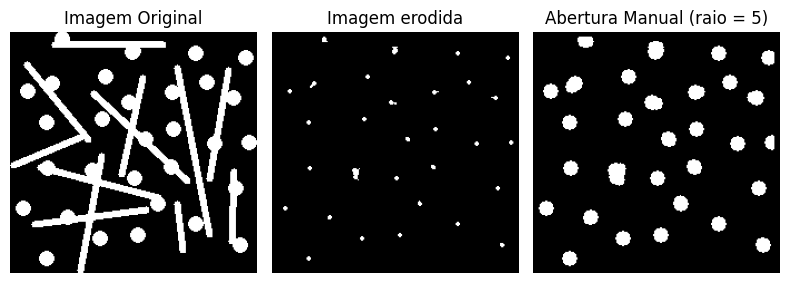

In [7]:
img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

# Função para criar um elemento estruturante circular manualmente
def criar_elemento_estruturante(raio):
    tamanho = raio * 2 + 1
    elemento_estruturante = np.zeros((tamanho, tamanho), dtype=np.uint8)
    centro = raio  # O centro do círculo está no meio da matriz
    
    # Preencher a matriz com base na equação do círculo
    for i in range(tamanho):
        for j in range(tamanho):
            if (i - centro)**2 + (j - centro)**2 <= raio**2:
                elemento_estruturante[i, j] = 1
                
    return elemento_estruturante

def erosao(imagem, el_estruturante):
    img_erodida = np.zeros_like(imagem, dtype=np.uint8)
    x, y = el_estruturante.shape

    borda_x = x // 2
    borda_y = y // 2

    for i in range(borda_x, imagem.shape[0] - borda_x):
        for j in range(borda_y, imagem.shape[1] - borda_y):
            janela = imagem[i - borda_x:i + borda_x + 1, j - borda_y:j + borda_y + 1]
            
            if np.all(janela[el_estruturante == 1] == 255):  
                img_erodida[i, j] = 255  # Cor branca

    return img_erodida

def dilacao(imagem, el_estruturante):
    img_dilatada = np.zeros_like(imagem, dtype=np.uint8)
    x, y = el_estruturante.shape

    borda_x = x // 2
    borda_y = y // 2

     # Varre a imagem e aplica a dilação
    for i in range(borda_x, imagem.shape[0] - borda_x):
        for j in range(borda_y, imagem.shape[1] - borda_y):
            janela = imagem[i - borda_x:i + borda_x + 1, j - borda_y:j + borda_y + 1]
            if np.any(janela[el_estruturante == 1] > 0):
                img_dilatada[i, j] = 255  # Cor branca
    return img_dilatada


raio = 5
elemento_estruturante = criar_elemento_estruturante(raio)
imagem_erodida = erosao(img1, elemento_estruturante)
imagem_aberta = dilacao(imagem_erodida, elemento_estruturante)

plt.figure(figsize=(8, 8))

plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Imagem erodida")
plt.imshow(imagem_erodida, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Abertura Manual (raio = {raio})")
plt.imshow(imagem_aberta, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()

2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


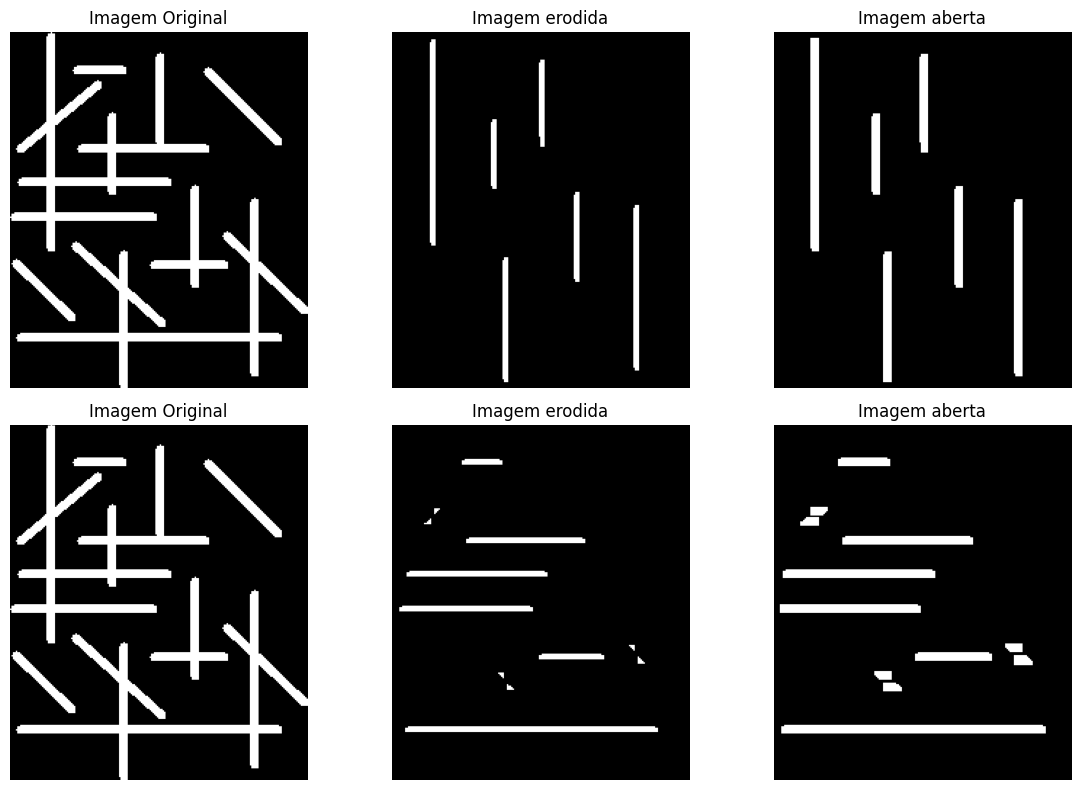

In [106]:
img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

#Exercício a)
el_estruturante = np.ones((9, 3), dtype=np.uint8)
imagem_erodida_v = erosao(img2, el_estruturante)
imagem_aberta_v = dilacao(imagem_erodida_v, el_estruturante)

#Exercicio b)
el_estruturante_h = np.ones((3, 9), dtype=np.uint8)

#Elemento estruturante maior 
#el_estruturante_h = np.ones((5, 13), dtype=np.uint8)
imagem_erodida_h = erosao(img2, el_estruturante_h)
imagem_aberta_h = dilacao(imagem_erodida_h, el_estruturante_h)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1) 
plt.title("Imagem Original")
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)  
plt.title("Imagem erodida")
plt.imshow(imagem_erodida_v, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)  
plt.title("Imagem aberta")
plt.imshow(imagem_aberta_v, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4) 
plt.title("Imagem Original")
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)  
plt.title("Imagem erodida")
plt.imshow(imagem_erodida_h, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)  
plt.title("Imagem aberta")
plt.imshow(imagem_aberta_h, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

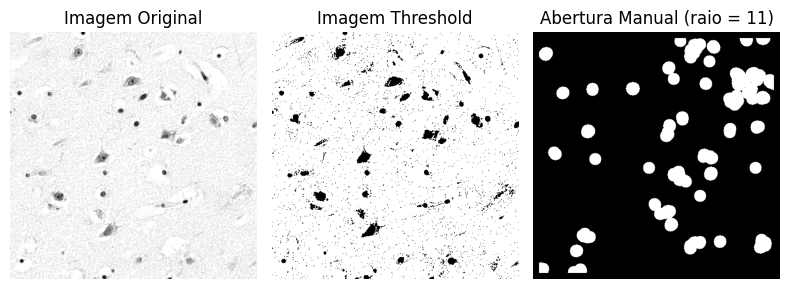

In [117]:
img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

_, imagem = cv2.threshold(img3, 210, 255, cv2.THRESH_BINARY)

raio = 11
el_est = criar_elemento_estruturante(raio)

im_erosao = erosao(imagem, el_est)
im_aberta = dilacao(im_erosao, el_est)

plt.figure(figsize=(8, 8))

plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(img3, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Imagem Threshold")
plt.imshow(imagem, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Abertura Manual (raio = {raio})")
plt.imshow(im_aberta, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()

c) Não pois operação de abertura é mais adequada para remover pequenos objetos e reter os maiores.

4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

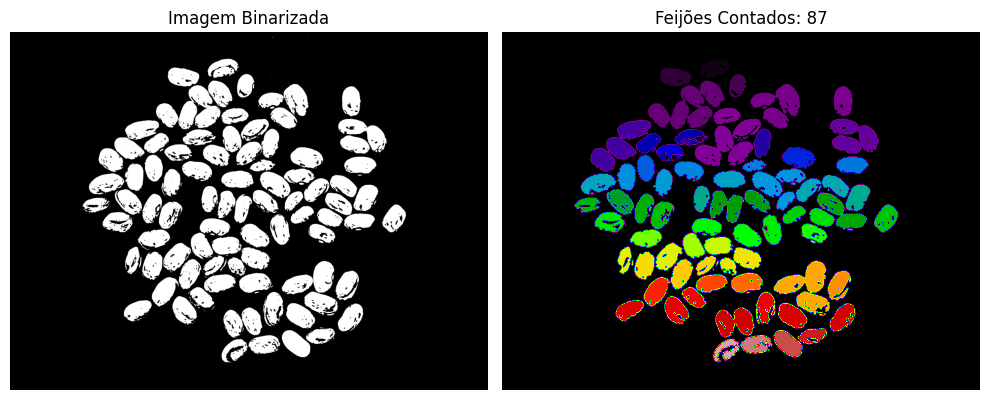

Número de feijões detectados: 87


In [126]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

# Aplicar um filtro de suavização
img_suave = cv2.medianBlur(img4, 5)

_, img_bin = cv2.threshold(img_suave, 0, 255, cv2.THRESH_OTSU)

elemento_estruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

img_abertura = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, elemento_estruturante)

img_fechamento = cv2.morphologyEx(img_abertura, cv2.MORPH_CLOSE, elemento_estruturante)

num_labels, labels = cv2.connectedComponents(img_fechamento)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagem Binarizada")
plt.imshow(img_bin, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Feijões Contados: {num_labels - 1}") #Rótulo 0
plt.imshow(labels, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Número de feijões detectados: {num_labels - 1}")


5.  Utilize a transformada hit or miss para localizar o logotipo da UFU. Escolha um deles

(9, 9)


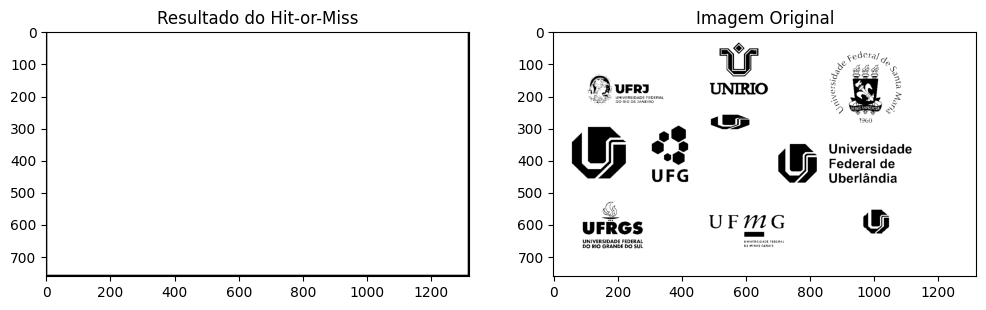

In [83]:
img5 = cv2.imread("logotipos.png", cv2.IMREAD_GRAYSCALE)
ufu = cv2.imread("logotipoUFU2.png", cv2.IMREAD_GRAYSCALE)

_, img_binaria = cv2.threshold(img5, 127, 255, cv2.THRESH_BINARY)
_, se_acerto = cv2.threshold(ufu, 127, 255, cv2.THRESH_BINARY)

se_acerto = cv2.resize(se_acerto, (9, 9))

se_erro = cv2.bitwise_not(se_acerto)

def hit_or_miss(img, se_acerto, se_erro):
    # Aplica erosão com o SE de acerto
    erosao_acerto = erosao(img, se_acerto)
    
    # Aplica erosão com o SE de perda no complemento da imagem
    complemento_img = 1 - img
    erosao_erro = erosao(complemento_img, se_erro)
 
    # Realiza a interseção lógica (AND)
    hit_miss_result = cv2.bitwise_and(erosao_acerto, erosao_erro)
    #hit_miss_result = erosao_acerto * erosao_erro

    return hit_miss_result

print(se_acerto.shape)

resultado = hit_or_miss(img_binaria, se_acerto, se_erro)

plt.figure(figsize=(12, 8))
# Exibir o resultado
plt.subplot(1, 2, 1)
plt.imshow(resultado, cmap='gray')
plt.title('Resultado do Hit-or-Miss')

plt.subplot(1, 2, 2)
plt.imshow(img_binaria, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')

plt.show()

6. Utilize operadores morfológicos para extração de fronteiras dos feijões. Mostre o resultado junto com a imagem original

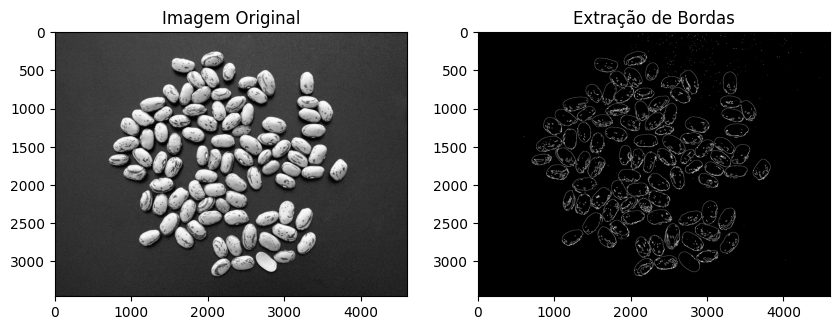

In [50]:
img = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

_, binary = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)

SE = np.ones((3,3), np.uint8)

dilated = cv2.dilate(binary, SE, iterations=1)
eroded = cv2.erode(binary, SE, iterations=1)
border = dilated - eroded

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(border, cmap='gray')
plt.title('Extração de Bordas')

plt.show()


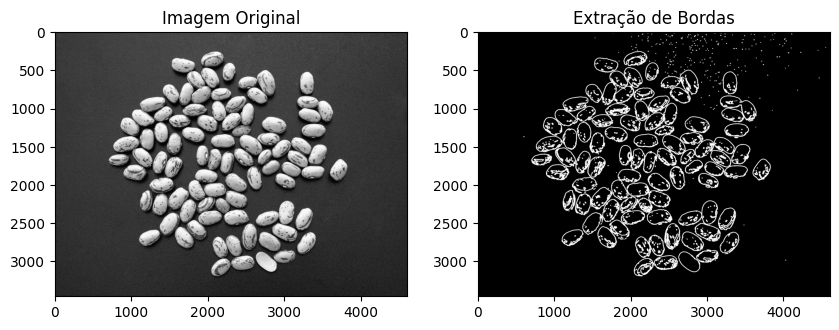

In [13]:
img = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

_, binary = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)


elemento_estruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

dilated = dilacao(binary, elemento_estruturante)
eroded = erosao(binary, elemento_estruturante)
border = dilated - eroded

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(border, cmap='gray')
plt.title('Extração de Bordas')

plt.show()
